Lo primero que haremos es importar las librerias necesarias para el trabajo:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A continuación leemos los datos de entrenamiento y de prueba de MNIST y los ingresamos en frames para el procesamiento de los datos

In [4]:
mnist_train = pd.read_csv("MNIST_data/mnist_train.csv")
mnist_test = pd.read_csv("MNIST_data/mnist_test.csv")

Usamos el método head para ver la estructura de los datos, con sus etiquetas

In [3]:
mnist_train.head(3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test.head(3)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar que la columna a categorizar es la primer columna que tiene por titulo "5" en el dataset de entramiento y "7" en el de prueba, el resto de columnas son los pixeles del dígito.

Ahora procedemos a dividir el dataset de entramiento y de prueba en datasets con los valores de los pixeles y otros con las categorias.

In [5]:
mnist_train_pixels = mnist_train.drop("5", axis=1) # pixeles del digito MNIST del dataset de entrenamiento
mnist_train_labels = mnist_train.iloc[:,0] # variable categorica del dataset de entrenamiento
mnist_test_pixels = mnist_test.drop("7", axis=1) # pixeles del digito MNIST del dataset de prueba
mnist_test_labels = mnist_test.iloc[:,0] # variable categorica del dataset de entrenamiento

procedemos a mirar el shape de los dataset de entrenamiento para darnos una idea de cuántos columnas y filas tiene cada uno y usamos el método head para ver como quedaron conformados los datasets

In [6]:
mnist_train_pixels.shape

(59999, 784)

In [7]:
mnist_train_pixels.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_train_labels.shape

(59999,)

In [9]:
mnist_train_labels.head(3)

0    0
1    4
2    1
Name: 5, dtype: int64

Ahora, para darnos una idea de los valores del dataset de entrenamiento procedemos a obtener la información descriptiva de éste.



In [10]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0, 
 maximo: 255, 
 media: 33.31839161605075, 
 mediana: 0.0, 
 valor mas comun: 0


Podemos observar que en el dataset encontramos valores entre 0 y 255 que son los colores de los pixeles que conforman el digito.

Para mejorar el rendimiento de nuestros clasificadores y ayudar a que los algoritmos iterativos de aprendizaje estadístico sean más rápidos para entrenar vamos a normalizar los valores del dataset, convirtiendo los valores en 0 para los pixeles blancos y 1 para los negros.

In [6]:
mnist_train_pixels = mnist_train_pixels / 255
mnist_test_pixels = mnist_test_pixels / 255

In [12]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0.0, 
 maximo: 1.0, 
 media: 0.130660359271895, 
 mediana: 0.0, 
 valor mas comun: 0.0


Ahora procederemos a obtener la información del primer digito del dataset.

In [5]:
first_image_data = mnist_train_pixels.iloc[0]

Obtengamos su shape

In [6]:
first_image_data.shape

(784,)

Hay 784 valores, es decir, 784 pixeles que conforman cada digito de MNIST.

Vamos a proceder a convertir el vector de 784 datos en una matriz de 28x28, esto se ingresara en la variable first_image y procederemos a graficar cada dato de la matriz con el fin de ver el primer número, que según el primer elemento del dataset de categorías (mnist_train_labels) debería ser un 0, este número también se guardara en la variable first_label para poder titular la gráfica con el digito.

In [7]:
first_image = first_image_data.values.reshape(28,28)
first_label = mnist_train_labels[0]

Procedemos a mirar la matriz first_image y a verificar que si sea una matriz 28x28 con el atributo shape

In [8]:
first_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
first_image.shape

(28, 28)

comprobamos que la variable si contiene el primer valor en el arreglo de categorias y procedemos a dibujar el primer digito.

In [10]:
first_label

0

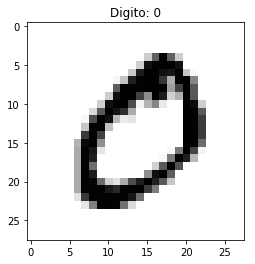

In [11]:
plt.imshow(first_image, cmap='gray_r')
plt.title('Digito: {}'.format(first_label))
plt.show()

Ahora, vamos a hacer un histograma con la variable que contiene los labels de los digitos del dataset para ver que tan distribuidos están los datos

(array([5923., 6742., 5958., 6131., 5842., 5420., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

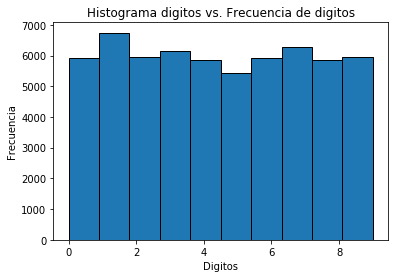

In [20]:
plt.title('Histograma digitos vs. Frecuencia de digitos')
plt.xlabel("Digitos")
plt.ylabel("Frecuencia")
plt.hist(mnist_train_labels, edgecolor = 'black')

Podemos observar que los datos están aproximadamente distribuidos de manera uniforme lo cual nos permite asegurar que el dataset tiene un buen balance de digitos para entrenar los modelos

# Regresión Logística Multinomial

Lo primero que haremos será importar la librería necesaria para entrenar el modelo

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Ahora instanciamos un objeto de la clase LogisticRegression de Sklearn enviando los siguientes parametros:

multi_class = "multinomial" para indicar que el problema que queremos resolver es multiclase.

Según la documentación de Sklearn, el parámetro solver, es usado para definir cuál es el algoritmo de optimización a usar en nuestro modelo, además, se menciona que "newton-cg", "sag", "saga" y "lbfgs" son algoritmos que funcionan bien para problemas multinomiales como es nuestro caso. Se descarta "liblinear" por ser un algoritmo que funciona bien para datasets pequeños, contrario al dataset de MNIST. [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html]

Vamos a entrenar cuatro modelos con cada uno de los algoritmos de optimización mencionados y compararemos los resultados de cada uno con el fin de ver cual es la mejor opción para nuestro dataset.

In [23]:
solver_algorithms = ["sag", "saga", "newton-cg", "lbfgs"]
model_accuracy = []
classification_reports = []

for algorithm in solver_algorithms:
    logistic_regression_model = LogisticRegression(solver=algorithm, multi_class='multinomial', max_iter=300)
    logistic_regression_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = logistic_regression_model.predict(mnist_test_pixels)
    model_accuracy.append(logistic_regression_model.score(mnist_test_pixels, mnist_test_labels))
    classification_reports.append(classification_report(mnist_test_labels, predictions))

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:
for report, algorithm in zip(classification_reports, solver_algorithms):
    print("Reporte de clasificación para método de optimización: " + algorithm  + "\n" + report)

Reporte de clasificación para método de optimizacion: sag
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.90      0.92      0.91      1010
          4       0.94      0.94      0.94       982
          5       0.90      0.87      0.88       892
          6       0.94      0.95      0.95       958
          7       0.93      0.92      0.93      1027
          8       0.88      0.88      0.88       974
          9       0.91      0.92      0.91      1009

avg / total       0.93      0.93      0.93      9999

Reporte de clasificación para método de optimizacion: saga
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.90      0.9

In [35]:
for accuracy, algorithm in zip(model_accuracy, solver_algorithms):
    print("Precisión del modelo con el método de optimización " + algorithm + ": " + str(accuracy))

Precisión del modelo con el método de optimización sag: 0.9256925692569257
Precisión del modelo con el método de optimización saga: 0.9253925392539254
Precisión del modelo con el método de optimización newton-cg: 0.9255925592559255
Precisión del modelo con el método de optimización lbfgs: 0.9260926092609261


Se puede notar que la precisión de los cuatro modelos es similar (93%) siendo **lbfgs** el mejor método de optimización por muy poca diferencia. 

# Árboles de clasificación

Primero, importamos la librería necesaria para crear un árbol de clasificación

In [5]:
from sklearn.tree import DecisionTreeClassifier

El parámetro que vamos a variar en el Árbol de Clasificación es min_samples_split, este parámetro nos indica la cantidad de muestras minímas necesarias para dividir un nodo, esta variable tomará valores de 10% a 100% con un aumento del 10% entre valores

In [6]:
# Acá se crea un arreglo con los valores para el parámetro
samples_values = [value/100 for value in range(10,110,10)]
print(samples_values)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Procedemos a entrenar el módelo con cada uno de los valores de la muestra miníma y a tomar los valores de la precisión en la predicción del módelo para poder comparar los resultados al final.

In [7]:
model_accuracy = [] # Variable para guardar los resultados de la precisión del modelo
for sample_split in samples_values:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=sample_split)
    decision_tree_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = decision_tree_model.predict(mnist_test_pixels)
    model_accuracy.append(decision_tree_model.score(mnist_test_pixels, mnist_test_labels))

In [11]:
for accuracy, sample in zip(model_accuracy, samples_values):
    print("Precisión del modelo dividiendo el árbol en muestras del " + str(int(sample*100)) + "%: " + str(accuracy))

Precisión del modelo dividiendo el árbol en muestras del 10%: 0.620962096209621
Precisión del modelo dividiendo el árbol en muestras del 20%: 0.5107510751075107
Precisión del modelo dividiendo el árbol en muestras del 30%: 0.41104110411041106
Precisión del modelo dividiendo el árbol en muestras del 40%: 0.3414341434143414
Precisión del modelo dividiendo el árbol en muestras del 50%: 0.27502750275027504
Precisión del modelo dividiendo el árbol en muestras del 60%: 0.27502750275027504
Precisión del modelo dividiendo el árbol en muestras del 70%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 80%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 90%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 100%: 0.1993199319931993


# Bosques Aleatorios

Importamos las librerías necesarias para usar el clasificador de bosques aleatorios

In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

El parámetro que podemos variar es el número de estimadores para el clasificador (n_estimators), según la documentación [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html] es la cantidad de árboles que se usará para el clasificador. 

Vamos a usar varios estimadores desde 1 hasta 200 con la finalidad de observar el comportamiento del módelo. Usualmente mientras más alto sea el número de árboles, mejor aprende el modelo, sin embargo, la velocidad de entrenamiento disminuye, por lo que haremos una busqueda del número de estimadores ideal teniendo en cuenta el porcentaje de error para cada estimador.

In [18]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200]
error_rate = []
model_accuracy = []

for estimator in n_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    random_forest_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = random_forest_model.predict(mnist_test_pixels)
    model_accuracy.append(random_forest_model.score(mnist_test_pixels, mnist_test_labels))
    error_rate.append(np.mean(predictions != mnist_test_labels))

A continuación observamos los valores de la precisión del modelo con las diferentes cantidades de estimadores.

In [19]:
for accuracy, estimator in zip(model_accuracy, n_estimators):
    print("Precisión del modelo con " + str(estimator) + " estimadores: " + str(accuracy))

Precisión del modelo con 1 estimadores: 0.8207820782078208
Precisión del modelo con 2 estimadores: 0.8296829682968296
Precisión del modelo con 4 estimadores: 0.9006900690069007
Precisión del modelo con 8 estimadores: 0.9400940094009401
Precisión del modelo con 16 estimadores: 0.9593959395939594
Precisión del modelo con 32 estimadores: 0.965096509650965
Precisión del modelo con 64 estimadores: 0.9682968296829683
Precisión del modelo con 100 estimadores: 0.9710971097109711
Precisión del modelo con 150 estimadores: 0.9710971097109711
Precisión del modelo con 200 estimadores: 0.9708970897089709


Se puede observar un incremento en la precisión cuando se incrementa el número de estimadores a excepción el último valor.

A continuación vamos a graficar el ratio de error con respecto a la cantidad de estimadores.

Text(0,0.5,'Error Rate')

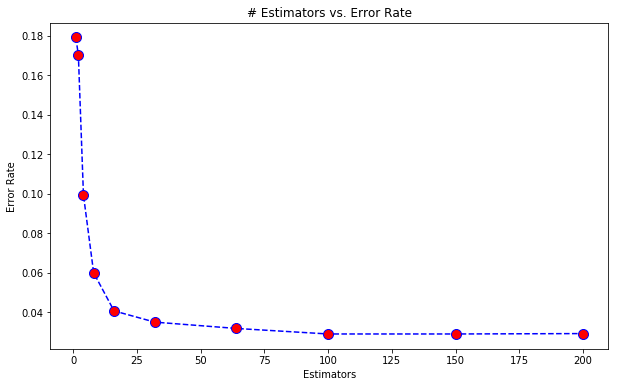

In [21]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('# Estimators vs. Error Rate')
plt.xlabel('Estimators')
plt.ylabel('Error Rate')

Se puede observar que después de 32 estimadores el ratio de error y la precisión del modelo (97%) es bastante similar a medida que se aumenta la cantidad de estimadores, por esta razón, la mejor cantidad de estimadores de los cuales tuvimos en cuenta para entrenar y predecir el módelo son 32 estimadores.

# Máquinas de Soporte Vectorial

Para máquinas de soporte vectorial usaremos una herramienta de Sklearn llamada GridSearchCV que nos ayudará a buscar los mejores parámetros a usar en nuestro modelo combinando diferentes valores para parametros como la penalización por error (c) y el gamma del kernel (gamma) usando validación cruzada.

Para esto, creamos un diccionario con los posibles valores que recibirá el modelo de Máquinas de Soporte Vectorial en sus parámetros y sobre los cuales el GridSearch comenzará a iterar.

Primero importaremos las librerías necesarias y después crearemos el diccionario con los valores.

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {"C": [1, 10, 100], "gamma": [0.1, 0.01, 0.001], "kernel": ["rbf"]} 

Después de tener definido el diccionario con los valores para los parámetros, procedemos a crear un objeto de GridSearchCv y a entrenarlo. Este modelo recibe:

- El módelo sobre el que va a iterar, en este caso, sobre SVC() que corresponde al modelo de Máquinas de Soporte Vectorial en la librería de Sklearn
- El diccionario con los posibles valores (param_grid)
- Refit lo usamos para poder obtener el atributo best_params_ que nos indicará cual fue la mejor combinación de parámetros encontrada
- n_jobs que indica la cantidad de procesadores a usar para el entrenamiento

In [17]:
grid = GridSearchCV(SVC(), param_grid, refit=True, n_jobs = 8)
grid.fit(mnist_train_pixels, mnist_train_labels)

/home/pslcol.com.co/drestrepom/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Después de haber entrenado el GridSearchCV obtenemos el atributo best_params_ para conocer la mejor combinación de parámetros para el módelo de Máquinas de Soporte Vectorial.

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Podemos ver que el mejor módelo se obtuvo con un C = 100 y gamma = 0.01 bajo el kernel rbf que es el predeterminado en el módelo de SVM.

Usaremos el método predict con el grid, este método hará las predicciones para el módelo de SVM con los parámetros descritos anteriormente y a continuación veremos el classification_report para ver la precision que obtuvo el modelo de SVM con c=100 y gamma=0.01.

In [20]:
grid_predictions = grid.predict(mnist_test_pixels)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(mnist_test_labels,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1027
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

   micro avg       0.98      0.98      0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



Se puede observar que el módelo obtuvo una precisión del 98%

# Redes Neuronales

Primero vamos a importar tensorflow y keras para construir nuestra red neuronal

In [24]:
import tensorflow as tf
import keras

Ahora, para que la red neuronal no tome los valores categoricos del 0 al 9 como valores númericos si no como categorias, vamos a hacer un one hot encoding con los dataset que contienen los labels (mnist_train_labels y mnist_test_labels). 

Para esto, definimos una variable con las 10 clases y procedemos a usar el método to_categorical de keras.

In [26]:
num_classes = 10
mnist_y_train = keras.utils.to_categorical(mnist_train_labels, num_classes)
mnist_y_test = keras.utils.to_categorical(mnist_test_labels, num_classes)

Definimos la variable image_size con un valor de 784, ésta será nuestra capa de entrada a la red neuronal.

Nuestra capa de salida será los vectores one-hot-encoded.

In [20]:
from keras.layers import Dense # Capa de red neuronal regular
from keras.models import Sequential # Configura el modelo para el entrenamiento

image_size = 784 # 28*28

In [21]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

In [22]:
def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(mnist_train_pixels, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(mnist_test_pixels, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Precision del modelo')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend(['entrenamiento', 'validacion'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


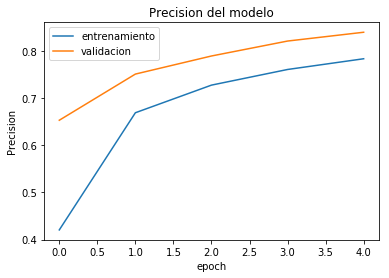


Test loss: 1.01
Test accuracy: 0.804
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


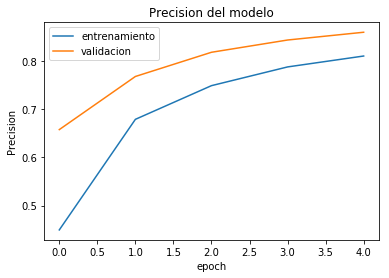


Test loss: 0.884
Test accuracy: 0.83
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


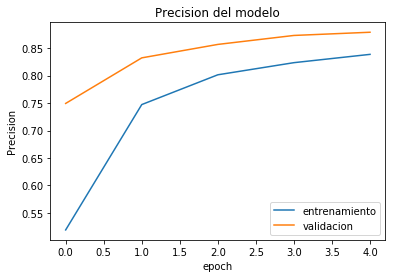


Test loss: 0.694
Test accuracy: 0.856
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


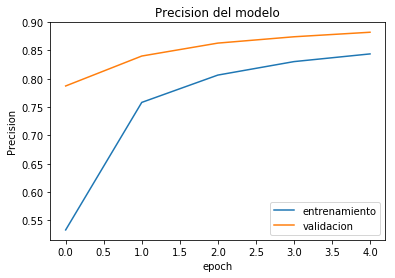


Test loss: 0.63
Test accuracy: 0.862


In [23]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)